# Import Libraries 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

# Import Dataset

In [2]:
data=pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


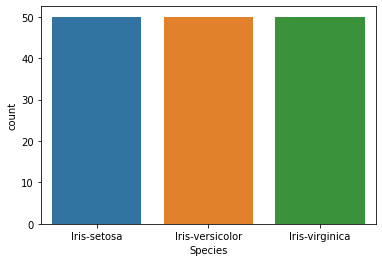

In [3]:
sns.countplot(data['Species'])

We can see that each class is represented in equal proportions. So, this does not have a class imbalance problem.

# Describe Data

In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data=data.drop('Id',axis=1)

In [21]:
X=data.iloc[:,[0,1,2,3]].values

# Identifying the Right Number of Clusters

In [23]:
sqerrors=[]
for i in range(1,21):
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(X)
    sqerrors.append(model.inertia_)

([<matplotlib.axis.XTick at 0x7fc71a6dbd60>,
 <a list of 21 Text major ticklabel objects>)

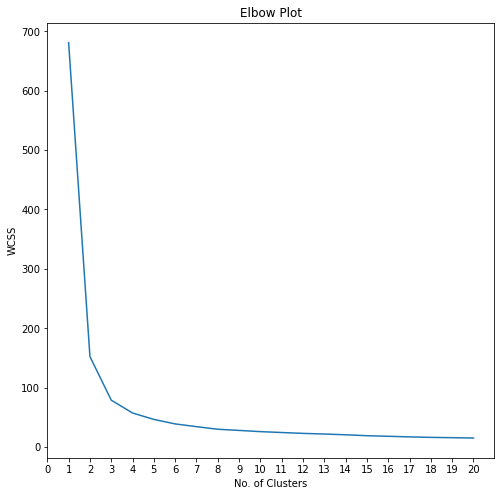

In [29]:
plt.figure(figsize=(8,8))
plt.plot(list(range(1,21)),sqerrors)
plt.title('Elbow Plot')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.xticks(ticks=list(range(21)))

From the plot, it is clear that the optimum number of clusters must be equal to 3.

# Final Modeling

In [30]:
finalmodel=KMeans(n_clusters=3,random_state=42)
labels=finalmodel.fit_predict(X)

In [31]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [41]:
clustercentres=finalmodel.cluster_centers_
clustercentres

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

# Visualizing the Clusters

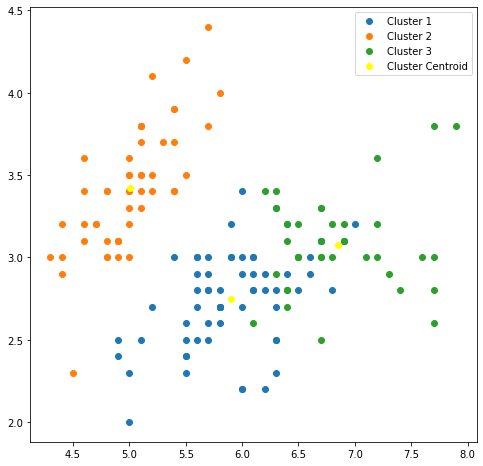

In [50]:
plt.figure(figsize=(8,8))
plt.scatter(X[labels==0,0],X[labels==0,1],label='Cluster 1')
plt.scatter(X[labels==1,0],X[labels==1,1],label='Cluster 2')
plt.scatter(X[labels==2,0],X[labels==2,1],label='Cluster 3')
plt.scatter(clustercentres[:,0],clustercentres[:,1],c='yellow',label='Cluster Centroid')
plt.legend()

# Training on Scaled Data

We all know that KMeans is a distance based Algorithm, so there is a chance of misgrouping of data because of its different scale. So, we can scale the data and train it on a new model.

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

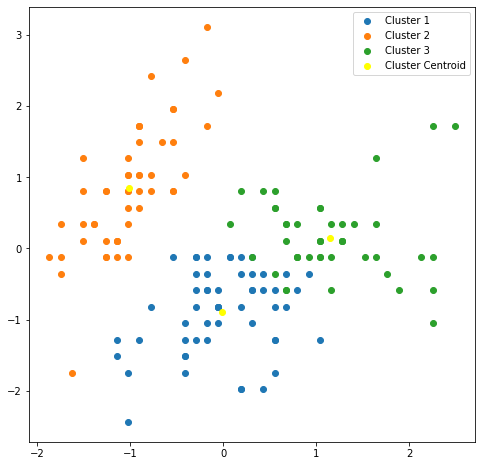

In [53]:
modelscaled=KMeans(n_clusters=3)
preds=modelscaled.fit_predict(X_scaled)
plt.figure(figsize=(8,8))
plt.scatter(X_scaled[preds==0,0],X_scaled[preds==0,1],label='Cluster 1')
plt.scatter(X_scaled[preds==1,0],X_scaled[preds==1,1],label='Cluster 2')
plt.scatter(X_scaled[preds==2,0],X_scaled[preds==2,1],label='Cluster 3')
plt.scatter(modelscaled.cluster_centers_[:,0],modelscaled.cluster_centers_[:,1],c='yellow',label='Cluster Centroid')
plt.legend()